<a href="https://colab.research.google.com/github/megha-puthukudi/main-project/blob/VGG19_SEVERE/vgg19_severity_severity_main_second_inthis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 840 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
80134624/80134624 [==============================] - 0s 0us/step


Epoch 1/100
52/52 [==============================] - 351s 7s/step - loss: 3.4001 - accuracy: 0.5194 - val_loss: 0.8880 - val_accuracy: 0.6534
Epoch 2/100
52/52 [==============================] - 15s 283ms/step - loss: 0.9410 - accuracy: 0.5995 - val_loss: 0.6891 - val_accuracy: 0.6705
Epoch 3/100
52/52 [==============================] - 15s 287ms/step - loss: 0.7733 - accuracy: 0.6505 - val_loss: 0.6849 - val_accuracy: 0.6875
Epoch 4/100
52/52 [==============================] - 18s 347ms/step - loss: 0.8037 - accuracy: 0.6286 - val_loss: 0.6538 - val_accuracy: 0.7045
Epoch 5/100
52/52 [==============================] - 16s 304ms/step - loss: 0.7515 - accuracy: 0.6406 - val_loss: 0.6876 - val_accuracy: 0.6761
Epoch 6/100
52/52 [==============================] - 15s 288ms/step - loss: 0.7416 - accuracy: 0.6529 - val_loss: 0.6442 - val_accuracy: 0.7102
Epoch 7/100
52/52 [==============================] - 15s 286ms/step - loss: 0.7353 - accuracy: 0.6626 - val_loss: 0.6881 - val_accuracy: 0

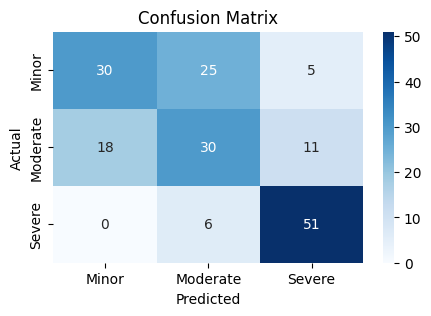

Recall: 0.6344
Precision: 0.6260
F1-score: 0.6260


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns

# Define your data directories
train_dir = '/content/drive/MyDrive/severity main/train'
val_dir = '/content/drive/MyDrive/severity main/validation'
test_dir = '/content/drive/MyDrive/severity main/test'

# Define image size and batch size
img_size = (224, 224)
batch_size = 16

# Create data generators with additional augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of VGG19
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(3, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=100,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.n // batch_size)

# Print results
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy * 100:.2f}')
print(f'Train loss: {train_loss:.4f}')
print(f'Train accuracy: {train_accuracy * 100:.2f}')

# Calculate metrics
y_true = []
y_pred = []
for _ in range(test_generator.n // batch_size):
    batch_x, batch_y = next(test_generator)
    y_true.extend(np.argmax(batch_y, axis=1))
    y_pred.extend(np.argmax(model.predict(batch_x), axis=1))

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Minor', 'Moderate', 'Severe'], yticklabels=['Minor', 'Moderate', 'Severe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate other metrics
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Display metrics
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-score: {f1:.4f}')

# Save the model
model.save('/content/drive/MyDrive/colabtest/another_vehicle_severity_VGG19_batch16updated_100epochs_severitymain_dataset_learningrae000001.h5')


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns

# Define your data directories
train_dir = '/content/drive/MyDrive/severity main/train'
val_dir = '/content/drive/MyDrive/severity main/validation'
test_dir = '/content/drive/MyDrive/severity main/test'

# Define image size and batch size
img_size = (224, 224)
batch_size = 16

# Create data generators with additional augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of VGG19
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(3, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=150,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.n // batch_size)

# Print results
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy * 100:.2f}')
print(f'Train loss: {train_loss:.4f}')
print(f'Train accuracy: {train_accuracy * 100:.2f}')

# Calculate metrics
y_true = []
y_pred = []
for _ in range(test_generator.n // batch_size):
    batch_x, batch_y = next(test_generator)
    y_true.extend(np.argmax(batch_y, axis=1))
    y_pred.extend(np.argmax(model.predict(batch_x), axis=1))

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Minor', 'Moderate', 'Severe'], yticklabels=['Minor', 'Moderate', 'Severe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate other metrics
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Display metrics
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-score: {f1:.4f}')

# Save the model
model.save('/content/drive/MyDrive/colabtest/another_vehicle_severity_VGG19_batch16updated_150epochs_severitymain_dataset_learningrae000001.h5')


Found 840 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


Epoch 1/150
52/52 [==============================] - 25s 422ms/step - loss: 3.3074 - accuracy: 0.4818 - val_loss: 0.6418 - val_accuracy: 0.6875
Epoch 2/150
52/52 [==============================] - 15s 284ms/step - loss: 0.8214 - accuracy: 0.6214 - val_loss: 0.7587 - val_accuracy: 0.5966
Epoch 3/150
52/52 [==============================] - 15s 289ms/step - loss: 0.8012 - accuracy: 0.6323 - val_loss: 0.6630 - val_accuracy: 0.6989
Epoch 4/150
52/52 [==============================] - 15s 294ms/step - loss: 0.7690 - accuracy: 0.6396 - val_loss: 0.6524 - val_accuracy: 0.6818
Epoch 5/150
52/52 [==============================] - 16s 298ms/step - loss: 0.7341 - accuracy: 0.6723 - val_loss: 0.6751 - val_accuracy: 0.6477
Epoch 6/150
52/52 [==============================] - 15s 286ms/step - loss: 0.7581 - accuracy: 0.6311 - val_loss: 0.7487 - val_accuracy: 0.6250
Epoch 7/150
52/52 [==============================] - 15s 290ms/step - loss: 0.7314 - accuracy: 0.6638 - val_loss: 0.6822 - val_accuracy:

Found 840 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


Epoch 1/100
52/52 [==============================] - 17s 304ms/step - loss: 2.8507 - accuracy: 0.5073 - val_loss: 0.7334 - val_accuracy: 0.6420
Epoch 2/100
52/52 [==============================] - 16s 300ms/step - loss: 0.8243 - accuracy: 0.6104 - val_loss: 0.7873 - val_accuracy: 0.6136
Epoch 3/100
52/52 [==============================] - 15s 290ms/step - loss: 0.8064 - accuracy: 0.6153 - val_loss: 0.7264 - val_accuracy: 0.6705
Epoch 4/100
52/52 [==============================] - 16s 301ms/step - loss: 0.7732 - accuracy: 0.6359 - val_loss: 0.6426 - val_accuracy: 0.6761
Epoch 5/100
52/52 [==============================] - 16s 300ms/step - loss: 0.7859 - accuracy: 0.6541 - val_loss: 0.6670 - val_accuracy: 0.6534
Epoch 6/100
52/52 [==============================] - 15s 294ms/step - loss: 0.7734 - accuracy: 0.6396 - val_loss: 0.7151 - val_accuracy: 0.6648
Epoch 7/100
52/52 [==============================] - 16s 308ms/step - loss: 0.7736 - accuracy: 0.6468 - val_loss: 0.6767 - val_accuracy:

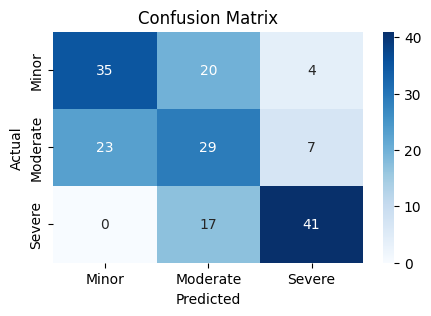

Test loss: 1.0659
Test accuracy: 59.09
Train loss: 0.3953
Train accuracy: 81.85
Recall: 0.5972
Precision: 0.6104
F1-score: 0.6026


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns

# Define your data directories
train_dir = '/content/drive/MyDrive/severity main/train'
val_dir = '/content/drive/MyDrive/severity main/validation'
test_dir = '/content/drive/MyDrive/severity main/test'

# Define image size and batch size
img_size = (224, 224)
batch_size = 16

# Create data generators with additional augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of VGG19
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(3, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=100,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.n // batch_size)


# Calculate metrics
y_true = []
y_pred = []
for _ in range(test_generator.n // batch_size):
    batch_x, batch_y = next(test_generator)
    y_true.extend(np.argmax(batch_y, axis=1))
    y_pred.extend(np.argmax(model.predict(batch_x), axis=1))

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Minor', 'Moderate', 'Severe'], yticklabels=['Minor', 'Moderate', 'Severe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate other metrics
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Display metrics
# Print results
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy * 100:.2f}')
print(f'Train loss: {train_loss:.4f}')
print(f'Train accuracy: {train_accuracy * 100:.2f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-score: {f1:.4f}')

# Save the model
model.save('/content/drive/MyDrive/colabtest/another_vehicle_severity_VGG19_batch16updated_100epochs_severitymain_dataset_learningrae0000001.h5')
